**IMPORTING NECESSARY LIBRARIES **

In [1]:
import os
import zipfile
from PIL import Image
import shutil
import matplotlib.pyplot as plt

**DEFINING PATH AND EXTRATING MAIN ZIp**

In [2]:
main_zip_path = '/content/PRCP-1001-RiceLeaf.zip'
extracted_main_folder = '/content/PRCP-1001-RiceLeaf'

# Step 1: Extract the main zip file
with zipfile.ZipFile(main_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_main_folder)

print(f"Main zip file extracted to: {extracted_main_folder}")

Main zip file extracted to: /content/PRCP-1001-RiceLeaf


**ECTRACTING NESTED ZIPFILES**

In [3]:
# Function to extract nested zip files
def extract_nested_zips(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.zip'):
                nested_zip_path = os.path.join(root, file)
                nested_extract_path = os.path.splitext(nested_zip_path)[0]

                print(f"Extracting nested zip file: {nested_zip_path}")
                with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
                    zip_ref.extractall(nested_extract_path)
                print(f"Nested zip file extracted to: {nested_extract_path}")


In [4]:
# Extract all nested zips
extract_nested_zips(extracted_main_folder)
print("All zip files have been extracted!")

Extracting nested zip file: /content/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight-20200814T055237Z-001.zip
Nested zip file extracted to: /content/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight-20200814T055237Z-001
Extracting nested zip file: /content/PRCP-1001-RiceLeaf/Data/Leaf smut-20200814T055530Z-001.zip
Nested zip file extracted to: /content/PRCP-1001-RiceLeaf/Data/Leaf smut-20200814T055530Z-001
Extracting nested zip file: /content/PRCP-1001-RiceLeaf/Data/Brown spot-20200814T055208Z-001.zip
Nested zip file extracted to: /content/PRCP-1001-RiceLeaf/Data/Brown spot-20200814T055208Z-001
All zip files have been extracted!


In [5]:
#VERIFYING FOLDER STRUCTURE AND COUNTING IMAGES
# Verify directory structure and count images
def count_and_list_images(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    image_count = 0
    image_files = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_count += 1
                image_files.append(os.path.join(root, file))
    return image_count, image_files



In [6]:
# Count images in the extracted folder
image_count, image_files = count_and_list_images(extracted_main_folder)
print(f"Total number of images found: {image_count}")

Total number of images found: 119


**ORGANIZE IMAGES INTO CATEGORIES**

In [7]:
# Define categories
categories = ['Brown spot', 'Leaf smut', 'Bacterial leaf blight']
data_path = '/content/PRCP-1001-RiceLeaf/Data'

In [8]:
# Create folders for categories
for category in categories:
    os.makedirs(os.path.join(data_path, category), exist_ok=True)


In [9]:
# Move images to category folders
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            for category in categories:
                if category in root:
                    src = os.path.join(root, file)
                    dest = os.path.join(data_path, category, file)
                    shutil.move(src, dest)

**COUNTING IMAGES PER CATEGORY**

In [104]:
# Count images in each category
for category in categories:
    category_path = os.path.join(data_path, category)
    num_images = len([f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{category}: {num_images} images")

Brown spot: 40 images
Leaf smut: 39 images
Bacterial leaf blight: 40 images


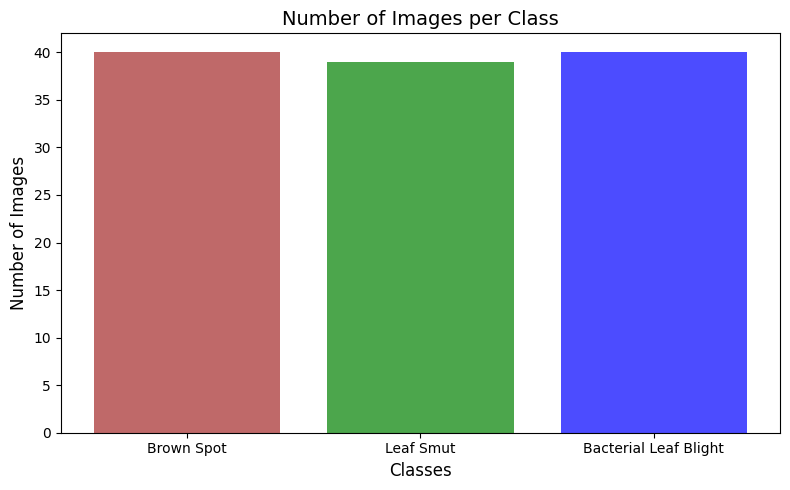

In [107]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Data for the image classes
classes = ["Brown Spot", "Leaf Smut", "Bacterial Leaf Blight"]
image_counts = [40, 39, 40]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(classes, image_counts, color=['brown', 'green', 'blue'], alpha=0.7)
plt.title("Number of Images per Class", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


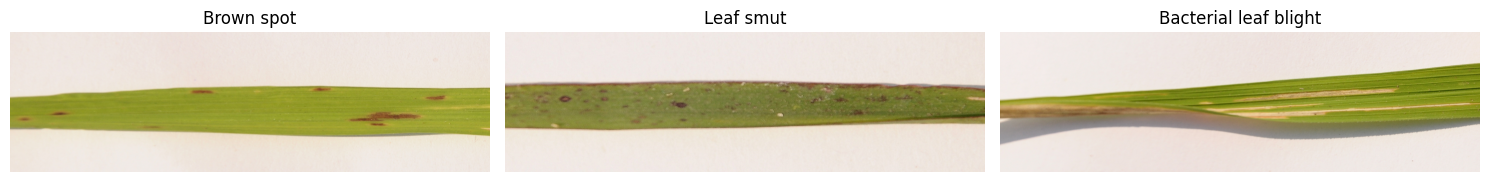

In [110]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Path to dataset - CORRECTED PATH
dataset_path = '/content/PRCP-1001-RiceLeaf/Data'
# Class folders
classes = ["Brown spot", "Leaf smut", "Bacterial leaf blight"]
# Display sample images from each class
plt.figure(figsize=(15, 5))

for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    sample_image = os.listdir(class_path)[0]  # Pick the first image in the folder
    image_path = os.path.join(class_path, sample_image)

    # Read and plot the image
    image = imread(image_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name.replace("_", " "), fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


We will preprocess the dataset by scaling pixel values to a range suitable for the model (0-1).




In [111]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Parameters
img_height, img_width = 128, 128  # Resize all images to 128x128
batch_size = 32

DATA AUGMENTATION AND PREPROCESSING

here we can observe error actually three classes are there but here it was showing 6 classes we will rectify this

In [119]:
for root, dirs, files in os.walk(dataset_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Root: /content/PRCP-1001-RiceLeaf/Data
Directories: ['Leaf smut', 'Bacterial leaf blight', 'Brown spot-20200814T055208Z-001', 'Leaf smut-20200814T055530Z-001', 'Bacterial leaf blight-20200814T055237Z-001', 'Brown spot']
Files: []
----------------------------------------
Root: /content/PRCP-1001-RiceLeaf/Data/Leaf smut
Directories: []
Files: ['DSC_0319.jpg', 'DSC_0322.jpg', 'DSC_0330.jpg', 'DSC_0320.JPG', 'DSC_0328.jpg', 'DSC_0293.JPG', 'DSC_0313.JPG', 'DSC_0507.jpg', 'DSC_0331.JPG', 'DSC_0321.JPG', 'DSC_0335.JPG', 'DSC_0338.JPG', 'DSC_0501.jpg', 'DSC_0312.JPG', 'DSC_0515.jpg', 'DSC_0317.JPG', 'DSC_0336.jpg', 'DSC_0309.JPG', 'DSC_0500.jpg', 'DSC_0510.jpg', 'DSC_0318.JPG', 'DSC_0503.jpg', 'DSC_0308.JPG', 'DSC_0502.jpg', 'DSC_0314.JPG', 'DSC_0504.jpg', 'DSC_0310.JPG', 'DSC_0316.JPG', 'DSC_0512.jpg', 'DSC_0513.jpg', 'DSC_0506.jpg', 'DSC_0315.jpg', 'DSC_0339.jpg', 'DSC_0327.JPG', 'DSC_0516.jpg', 'DSC_0514.jpg', 'DSC_0511.jpg', 'DSC_0509.jpg', 'DSC_0505.jpg']
--------------------------------

In [120]:
classes = ["Brown spot", "Leaf smut", "Bacterial leaf blight"]


In [121]:
import shutil

# Flatten the folder structure
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for root, dirs, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                src = os.path.join(root, file)
                dest = os.path.join(class_path, file)
                shutil.move(src, dest)
        # Remove any empty subfolders
        for dir in dirs:
            shutil.rmtree(os.path.join(root, dir))


In [122]:
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    print(f"{class_name} contains {len(os.listdir(class_path))} images.")

Brown spot contains 40 images.
Leaf smut contains 39 images.
Bacterial leaf blight contains 40 images.


In [123]:
print("Folders in dataset_path:")
print(os.listdir(dataset_path))


Folders in dataset_path:
['Leaf smut', 'Bacterial leaf blight', 'Brown spot-20200814T055208Z-001', 'Leaf smut-20200814T055530Z-001', 'Bacterial leaf blight-20200814T055237Z-001', 'Brown spot']


In [124]:
# Clean up unnecessary folders
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if folder not in ['Brown spot', 'Leaf smut', 'Bacterial leaf blight']:
        print(f"Removing folder: {folder}")
        shutil.rmtree(folder_path)  # Remove the folder


Removing folder: Brown spot-20200814T055208Z-001
Removing folder: Leaf smut-20200814T055530Z-001
Removing folder: Bacterial leaf blight-20200814T055237Z-001


In [125]:
print("Folders in dataset_path after cleanup:")
print(os.listdir(dataset_path))


Folders in dataset_path after cleanup:
['Leaf smut', 'Bacterial leaf blight', 'Brown spot']


#AFTER CLEANING NESTED ZIP AND EXTRA FOLDERS WE WANT TO TO DATA AUGMENTATION AND PREPROCESSING

In [132]:

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

In [133]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

Found 96 images belonging to 3 classes.


In [134]:
# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 23 images belonging to 3 classes.


In [135]:
print("Class indices:", train_generator.class_indices)


Class indices: {'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}


#BUILDING CNN MODEL

In [136]:
#BUILDING CNN MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [138]:
# Train the model
epochs = 100  # Adjust the number of epochs
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2227 - loss: 1.9524 - val_accuracy: 0.3043 - val_loss: 1.1791
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3594 - loss: 1.1212 - val_accuracy: 0.3478 - val_loss: 1.1029
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3477 - loss: 1.1096 - val_accuracy: 0.3913 - val_loss: 1.0895
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3398 - loss: 1.1016 - val_accuracy: 0.5217 - val_loss: 1.0810
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4401 - loss: 1.0829 - val_accuracy: 0.3043 - val_loss: 1.0866
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5182 - loss: 1.0618 - val_accuracy: 0.3478 - val_loss: 1.0463
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4076 - loss: 1.0480 - val_accuracy: 0.3478 - val_loss: 1.0830
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4427 - loss: 1.0492 - val_accuracy: 0.5652 - val_loss: 1.0419
Epoch 9/100
3/3 ━━

In [139]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - accuracy: 0.7826 - loss: 1.4186
Validation Loss: 1.418574333190918
Validation Accuracy: 0.782608687877655


Validation Loss: 1.4185 suggests the model is making some errors during validation. Lower loss values typically imply a better fit, but the absolute value of the loss depends on the scale
Validation Accuracy: 78.26% is a decent starting point

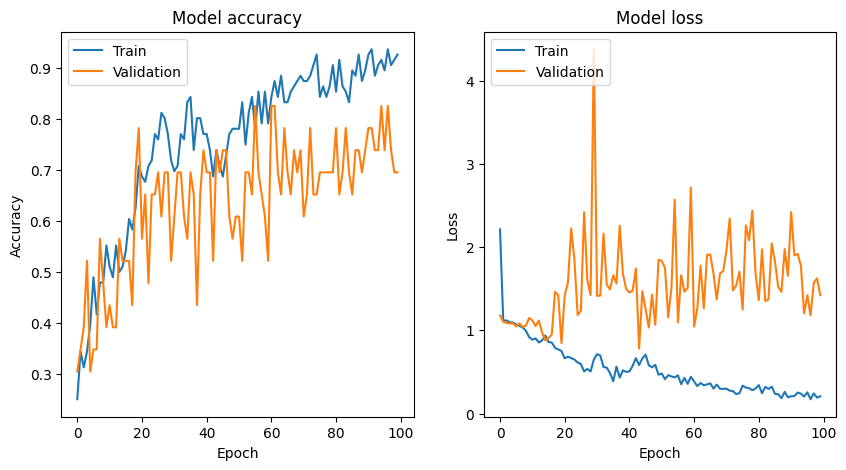

In [140]:

import matplotlib.pyplot as plt

# Assuming 'history' is the training history object from model.fit()
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**HYPER PARAMETRIC TUNING **

In [143]:
!pip install keras-tuner -q
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(tf.keras.layers.Conv2D(
            filters=hp.Int(f'conv_{i+2}_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice(f'conv_{i+2}_kernel', values = [3,5]),
            activation='relu'
        ))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=512, step=32),
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', 0, 0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [144]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(train_generator, epochs=10, validation_data=validation_generator)

Trial 27 Complete [00h 01m 28s]
val_accuracy: 0.739130437374115

Best val_accuracy So Far: 0.782608687877655
Total elapsed time: 00h 21m 24s


In [145]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [147]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('dense_1_units')},
the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}, and the optimal number of layers is {best_hps.get('n_layers')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288, 
the optimal learning rate for the optimizer
is 0.001, and the optimal number of layers is 3.



In [148]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2891 - loss: 1.2283 - val_accuracy: 0.3043 - val_loss: 1.0990
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3112 - loss: 1.0999 - val_accuracy: 0.5652 - val_loss: 1.0926
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2852 - loss: 1.1019 - val_accuracy: 0.3043 - val_loss: 1.0969
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4049 - loss: 1.0976 - val_accuracy: 0.3913 - val_loss: 1.0948
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.3659 - loss: 1.0953 - val_accuracy: 0.4348 - val_loss: 1.0895
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3854 - loss: 1.0865 - val_accuracy: 0.5652 - val_loss: 1.0735
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3880 - loss: 1.0886 - val_accuracy: 0.5652 - val_loss: 1.0490
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5378 - loss: 1.0450 - val_accuracy: 0.3913 - val_loss: 0.9872
Epoch

In [149]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step - accuracy: 0.6522 - loss: 0.8586
Validation Loss: 0.8585739135742188
Validation Accuracy: 0.6521739363670349


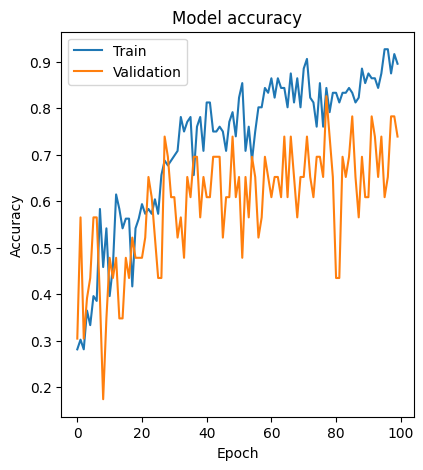

In [150]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

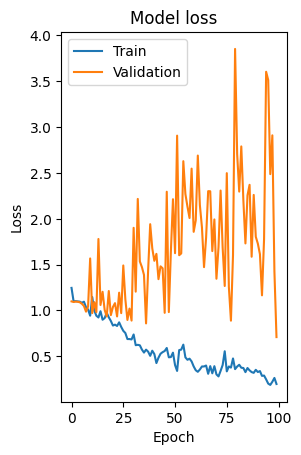

In [151]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

[VGG16 MODEL] VISUAL GEOMETRY GROUP 16

In [152]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


In [153]:
# Load pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [154]:
# Freeze the base model layers (IT WAS optional, but often helps prevent overfitting early on)
for layer in base_model.layers:
    layer.trainable = False


In [155]:
# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(3, activation='softmax')(x) # 3 output classes

In [156]:
# Create the final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)


In [157]:
# Compile the model
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [158]:
# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=100,  # Adjust the number of epochs
    validation_data=validation_generator
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 12s/step - accuracy: 0.3385 - loss: 1.6767 - val_accuracy: 0.4348 - val_loss: 1.0158
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 13s/step - accuracy: 0.5039 - loss: 1.1926 - val_accuracy: 0.6957 - val_loss: 0.6095
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.5286 - loss: 1.2253 - val_accuracy: 0.6087 - val_loss: 0.6728
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.5482 - loss: 0.9417 - val_accuracy: 0.5652 - val_loss: 0.9532
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 9s/step - accuracy: 0.7383 - loss: 0.7807 - val_accuracy: 0.6957 - val_loss: 0.6544
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 12s/step - accuracy: 0.5859 - loss: 0.8597 - val_accuracy: 0.7391 - val_loss: 0.6716
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.7760 - loss: 0.5376 - val_accuracy: 0.6087 - val_loss: 0.8823
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.7422 - loss: 0.7054 - val_accuracy: 0.7826 - val_loss: 0

In [159]:
# Evaluate the model
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(validation_generator)
print("VGG16 Validation Loss:", loss_vgg16)
print("VGG16 Validation Accuracy:", accuracy_vgg16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8261 - loss: 1.0361
VGG16 Validation Loss: 1.0360898971557617
VGG16 Validation Accuracy: 0.8260869383811951


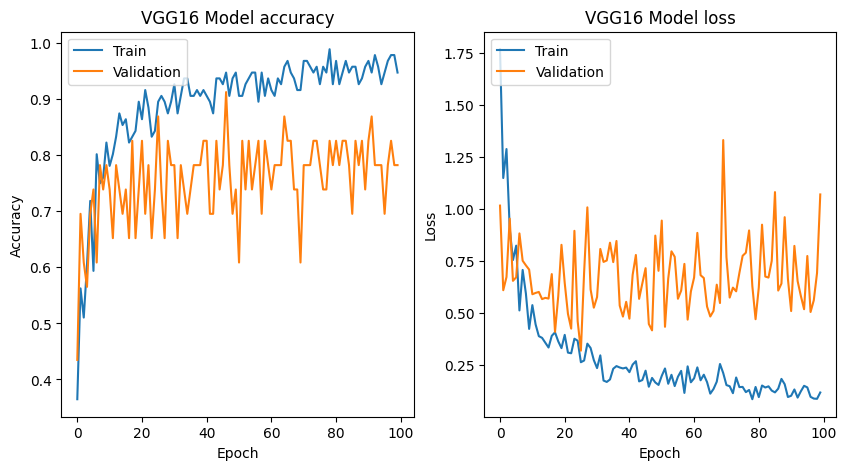

In [160]:
# Plot training history (similar to previous plots)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('VGG16 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**EFFICIENT NET MODEL **

In [161]:
!pip install -U efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [162]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0 # You can change the B0 to other versions like B1, B2, etc.
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [163]:
# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [164]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [165]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x) # Use GlobalAveragePooling2D instead of Flatten
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x) # 3 output classes

In [166]:
# Create the final model
model_efficientnet = Model(inputs=base_model.input, outputs=predictions)


In [167]:
# Compile the model
model_efficientnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [168]:
# Train the model
history_efficientnet = model_efficientnet.fit(
    train_generator,
    epochs=100,  # Adjust the number of epochs
    validation_data=validation_generator
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2591 - loss: 1.3132 - val_accuracy: 0.3478 - val_loss: 1.1315
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3190 - loss: 1.2037 - val_accuracy: 0.3043 - val_loss: 1.1752
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3125 - loss: 1.1588 - val_accuracy: 0.3043 - val_loss: 1.1233
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3503 - loss: 1.1141 - val_accuracy: 0.3478 - val_loss: 1.1003
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2904 - loss: 1.1234 - val_accuracy: 0.3478 - val_loss: 1.1047
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2617 - loss: 1.1340 - val_accuracy: 0.3478 - val_loss: 1.0976
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3333 - loss: 1.1129 - val_accuracy: 0.3043 - val_loss: 1.1075
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2448 - loss: 1.1509 - val_accuracy: 0.3043 - val_loss: 1.1277
Epoch 9

In [169]:
# Evaluate the model
loss_efficientnet, accuracy_efficientnet = model_efficientnet.evaluate(validation_generator)
print("EfficientNet Validation Loss:", loss_efficientnet)
print("EfficientNet Validation Accuracy:", accuracy_efficientnet)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3478 - loss: 1.0985
EfficientNet Validation Loss: 1.098522663116455
EfficientNet Validation Accuracy: 0.3478260934352875


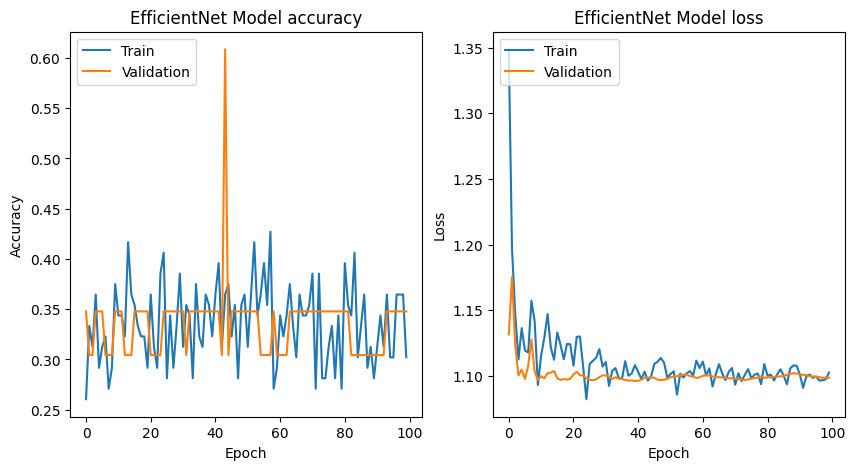

In [170]:
# Plot training history (similar to previous plots)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_efficientnet.history['accuracy'])
plt.plot(history_efficientnet.history['val_accuracy'])
plt.title('EfficientNet Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_efficientnet.history['loss'])
plt.plot(history_efficientnet.history['val_loss'])
plt.title('EfficientNet Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**FINAL CONCLUSION **
1. CNN (Baseline Model)
Before Hyperparameter Tuning: Validation Loss: 1.4186
AND Validation Accuracy: 78.26%

After Hyperparameter Tuning: Validation Loss: 0.8586
AND Validation Accuracy: 65.22%

OBSERVATION : After hyperparameter tuning, the loss improved (lowered), but the accuracy dropped significantly. This suggests the model might have overfit or found a suboptimal point in the loss landscape.

2.VGG16 (Pretrained Model)

Validation Loss: 1.0361

Validation Accuracy: 82.61%

OBSERVATION : VGG16 outperformed the CNN model in terms of accuracy while maintaining a relatively lower loss. It seems to generalize well for my dataset. This is expected because VGG16 benefits from pretrained weights and a deeper architecture designed for robust feature extraction.

3.EfficientNet

Validation Loss: 1.0985

Validation Accuracy: 34.78%

OBSERVATION :

The low accuracy suggests that EfficientNet is struggling to learn meaningful patterns on my  dataset. or a mismatch between the dataset size and EfficientNet's requirements. EfficientNet is powerful but often requires more data and careful fine-tuning.






#RECOMMENDATION :

Based on these results:


VGG16 is the most recommendable model because it has the highest validation accuracy (82.61%) and a reasonable loss. It leverages the strength of transfer learning effectively.

CNN (Original) could also be considered if I want a simpler model, though it performs slightly worse than VGG16.

EfficientNet might not be suitable unless If i  can improve its performance with additional tuning or a larger dataset.